In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Question 1

In [2]:
# define the datasets
dc = [118.8, 122.6, 115.6, 113.6, 119.5, 115.9, 115.8, 115.1, 116.9, 115.4, 115.6, 107.9]
dcmk = [105.4, 101.1, 102.7, 97.1, 101.9, 98.9, 100.0, 99.8, 102.6, 100.9, 104.5, 93.5]
mc = [102.1, 105.8, 99.6, 102.7, 98.8, 100.9, 102.8, 98.7, 94.7, 97.8, 99.7, 98.6]

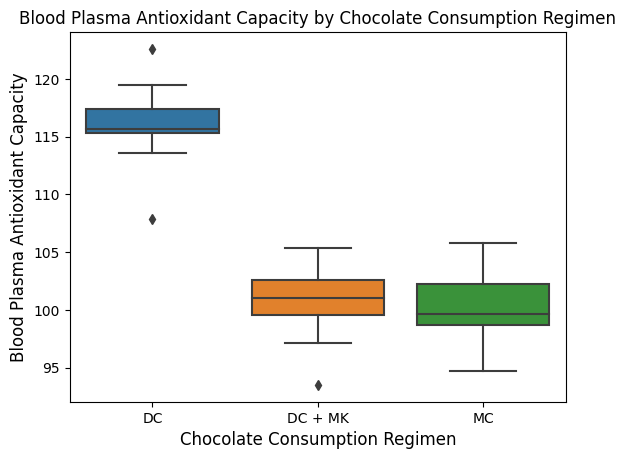

In [3]:
# create the boxplot
data = pd.DataFrame({'DC': dc, 'DC + MK': dcmk, 'MC': mc})
sns.boxplot(data=data)
plt.ylabel('Blood Plasma Antioxidant Capacity', fontsize=12)
plt.xlabel('Chocolate Consumption Regimen', fontsize=12)
plt.title('Blood Plasma Antioxidant Capacity by Chocolate Consumption Regimen', fontsize=12)
plt.show()

In [4]:
# compute means
print(f"DC Mean: {np.mean(dc)}")
print(f"DC + MK Mean: {np.mean(dcmk)}")
print(f"MC Mean: {np.mean(mc)}")
print(f"Total Mean: {(np.sum(dc) + np.sum(dcmk) + np.sum(mc)) / (len(dc) + len(dcmk) + len(mc))}")

# compute SSB
ssb = 0
for i in range(3):
    ssb += len(data.iloc[:, i]) * (np.mean(data.iloc[:, i]) - np.mean(data.iloc[:, :].mean())) ** 2
print(f"SSB: {ssb}")
df_between = 3 - 1
msb = ssb / df_between
print(f"MSB: {ssb / df_between}")

# compute SSW
ssw = 0
for i in range(3):
    for j in range(12):
        ssw += (data.iloc[j, i] - data.iloc[:, i].mean()) ** 2
print(f"SSW: {ssw}")
df_within = 3 * (len(dc) - 1)
msw = ssw / df_within
print(f"MSW: {ssw / df_within}")

# compute F statistic
f = msb / msw
print(f"F: {f}")

DC Mean: 116.05833333333334
DC + MK Mean: 100.7
MC Mean: 100.18333333333332
Total Mean: 105.64722222222223
SSB: 1952.6438888888908
MSB: 976.3219444444454
SSW: 344.30583333333317
MSW: 10.433510101010096
F: 93.5755977607119


In [5]:
# critical f for alpha = 0.05 and df_between = 2, df_within = 33
alpha = 0.05
f_crit = stats.f.ppf(1 - alpha, df_between, df_within)
print(f"F Critical: {f_crit}")
print(f"p-value: {1 - stats.f.cdf(f, df_between, df_within)}")

F Critical: 3.2849176510382883
p-value: 2.5202062658991053e-14


In [6]:
alpha = 0.05 # given significance level
f, p = stats.f_oneway(dc, dcmk, mc) # perform one-way ANOVA

print('F value:', f)
print('P value:', p)

# interpretation of p-value
if p < alpha:
    print(f"p = {p:.18f} < alpha = {alpha} ==> reject null hypothesis.")
    print("Thus, there is a significant difference between the regimen.")
else:
    print(f"p = {p:.3f} >= alpha = {alpha} ==> fail to reject null hypothesis.")
    print("Thus, there is not a significant difference between the regimen.")

F value: 93.57559776071176
P value: 2.5152590041683006e-14
p = 0.000000000000025153 < alpha = 0.05 ==> reject null hypothesis.
Thus, there is a significant difference between the regimen.


# Question 2

In [7]:
alpha = 0.05
t = stats.t.ppf(1 - alpha/2, 3 * (len(dc) - 1))

# these are invariant to the CI we are trying to compute
dc_midrange = t * np.sqrt(msw / len(dc))
dcmk_midrange = t * np.sqrt(msw / len(dcmk))
mc_midrange = t * np.sqrt(msw / len(mc))

# print the 95% CI for each regimen
print(f"DC 95% CI: {np.mean(dc) - dc_midrange} - {np.mean(dc) + dc_midrange}")
print(f"DC + MK 95% CI: {np.mean(dcmk) - dcmk_midrange} - {np.mean(dcmk) + dcmk_midrange}")
print(f"MC 95% CI: {np.mean(mc) - mc_midrange} - {np.mean(mc) + mc_midrange}")


DC 95% CI: 114.16125371975602 - 117.95541294691066
DC + MK 95% CI: 98.80292038642268 - 102.59707961357732
MC 95% CI: 98.286253719756 - 102.08041294691064


In [8]:
# compute LSD
lsd = stats.t.ppf(1 - alpha / 2, df_within) * np.sqrt(2 * msw / 12)
print(lsd)

2.6828757184225593


In [9]:
# pairwise comparison
print("DC - DCMK:", np.mean(dc) - np.mean(dcmk))
print("DC - MC:", np.mean(dc) - np.mean(mc))
print("DCMK - MC:", np.mean(dcmk) - np.mean(mc))

DC - DCMK: 15.358333333333334
DC - MC: 15.875000000000014
DCMK - MC: 0.5166666666666799


In [10]:
# perform t-test for the three pairs
t_mc_dcmk, p_mc_dcmk = stats.ttest_ind(dc, dcmk)
t_mc_dc, p_mc_dc = stats.ttest_ind(dc, mc)
t_dcmk_mc, p_dcmk_mc = stats.ttest_ind(dcmk, mc)

# t-statistics for the three pairs
print("t-statistics:")
print("DC - DCMK:", t_mc_dcmk)
print("DC - MC:", t_mc_dc)
print("DCMK - MC:", t_dcmk_mc)
print()

# p-values from the t-statistics
print("p-values:")
print("DC - DCMK:", p_mc_dcmk)
print("DC - MC:", p_mc_dc)
print("DCMK - MC:", p_dcmk_mc)
print()

# Bonferroni correction for the p-values
print("Corrected p-values:")
print("DC - DCMK:", min(1, p_mc_dcmk*3))
print("DC - MC:", min(1, p_mc_dc*3))
print("DCMK - MC:", min(1, p_dcmk_mc*3))

t-statistics:
DC - DCMK: 11.10565260090929
DC - MC: 12.047774079768462
DCMK - MC: 0.4126071170622644

p-values:
DC - DCMK: 1.733093968209115e-10
DC - MC: 3.683389152570871e-11
DCMK - MC: 0.6838877988482657

Corrected p-values:
DC - DCMK: 5.199281904627344e-10
DC - MC: 1.1050167457712614e-10
DCMK - MC: 1


# Problem 3

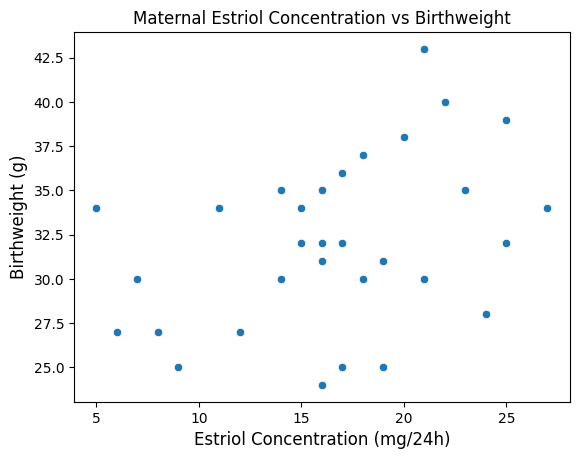

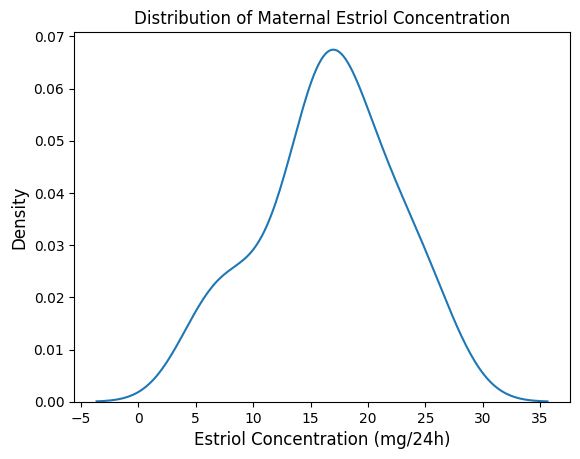

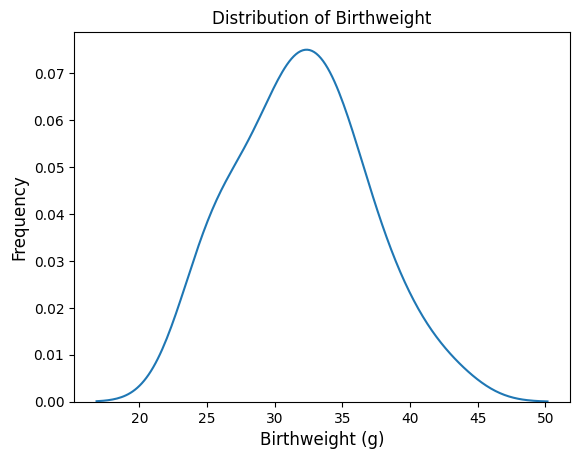

ShapiroResult(statistic=0.9709982872009277, pvalue=0.5469393134117126)
ShapiroResult(statistic=0.9749801754951477, pvalue=0.6641889214515686)


In [11]:
# plot scatterplot, estriol vs birthweight
data = pd.read_csv('Birthweight_Estriol.csv')
sns.scatterplot(x='Estriol', y='Birthweight', data=data)
plt.xlabel('Estriol Concentration (mg/24h)', fontsize=12)
plt.ylabel('Birthweight (g)', fontsize=12)
plt.title('Maternal Estriol Concentration vs Birthweight', fontsize=12)
plt.show()

# plot kde of estriol
sns.kdeplot(data['Estriol'])
plt.xlabel('Estriol Concentration (mg/24h)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Maternal Estriol Concentration', fontsize=12)
plt.show()

# plot kde of birthweight
sns.kdeplot(data['Birthweight'])
plt.xlabel('Birthweight (g)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Birthweight', fontsize=12)
plt.show()

# test for normality
print(stats.shapiro(data['Estriol']))
print(stats.shapiro(data['Birthweight']))

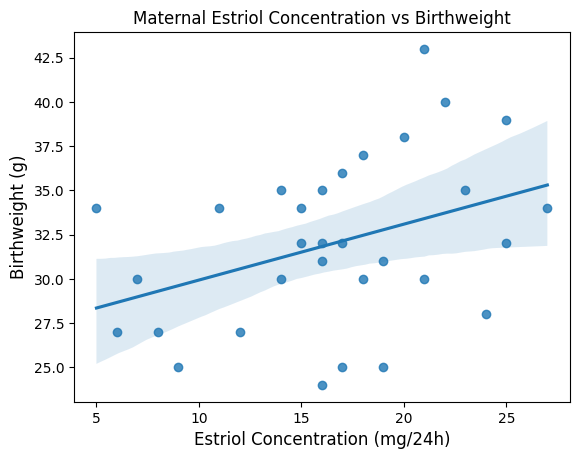

In [12]:
# add regression line
sns.regplot(x='Estriol', y='Birthweight', data=data)
plt.xlabel('Estriol Concentration (mg/24h)', fontsize=12)
plt.ylabel('Birthweight (g)', fontsize=12)
plt.title('Maternal Estriol Concentration vs Birthweight', fontsize=12)
plt.show()

In [13]:
# compute covariances

# averages and number of data points
n = len(data)
xbar = np.mean(data['Estriol'])
ybar = np.mean(data['Birthweight'])
print(n, xbar, ybar)

# covariance
print(np.sum((data['Estriol'] - xbar) * (data['Birthweight'] - ybar))) # cov(x, y) without the division by n-1
print(np.sum((data['Estriol'] - xbar) * (data['Birthweight'] - ybar))/(n-1)) # cov(x, y)

# variance
print(np.sum((data['Estriol'] - xbar) ** 2)) # var(x) without the division by n-1
print(np.sum((data['Estriol'] - xbar) ** 2)/(n-1)) # var(x)

# variance
print(np.sum((data['Birthweight'] - ybar) ** 2)) # var(y) without the division by n-1
print(np.sum((data['Birthweight'] - ybar) ** 2)/(n-1)) # var(y)

# covariance matrix
covariance = np.cov(data['Estriol'], data['Birthweight'])
print(covariance)

31 16.548387096774192 32.0
311.0
10.366666666666667
983.6774193548387
32.78924731182796
674.0
22.466666666666665
[[32.78924731 10.36666667]
 [10.36666667 22.46666667]]


In [14]:
# get sample stdevs
stdev_x = np.std(data['Estriol'], ddof=1)
stdev_y = np.std(data['Birthweight'], ddof=1)
print(stdev_x, stdev_y)

5.7261895979637245 4.73990154609425


In [15]:
# get correlation matrix
correlation = np.corrcoef(data['Estriol'], data['Birthweight'])
print(correlation)

[[1.         0.38194787]
 [0.38194787 1.        ]]


In [16]:
# perform hypothesis test where H0: rho = 0
corr_xy = covariance[0][1] / (stdev_x * stdev_y)
t_stat = corr_xy * np.sqrt(n - 2) / np.sqrt(1 - corr_xy ** 2)
t_crit = stats.t.ppf(1 - alpha/2, n - 2)
p = 2 * (1 - stats.t.cdf(t_stat, n - 2))
print(t_stat, t_crit, p)

2.225587656674718 2.0452296421327034 0.03397726988826277
